In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [19]:
# Cesta k výsledkům
results_path = '../results/all_model_results.csv'
results_df = pd.read_csv(results_path)

# Náhled na výsledky
results_df.head()

,ticker,sector,train_loss,val_loss
0,NVDA,Technology,0.00011,0.00807
1,MSFT,Technology,0.00054,0.00383
2,AAPL,Technology,0.00067,0.00144
3,META,Communication,0.00039,0.00181
4,DIS,Communication,0.00089,0.00029


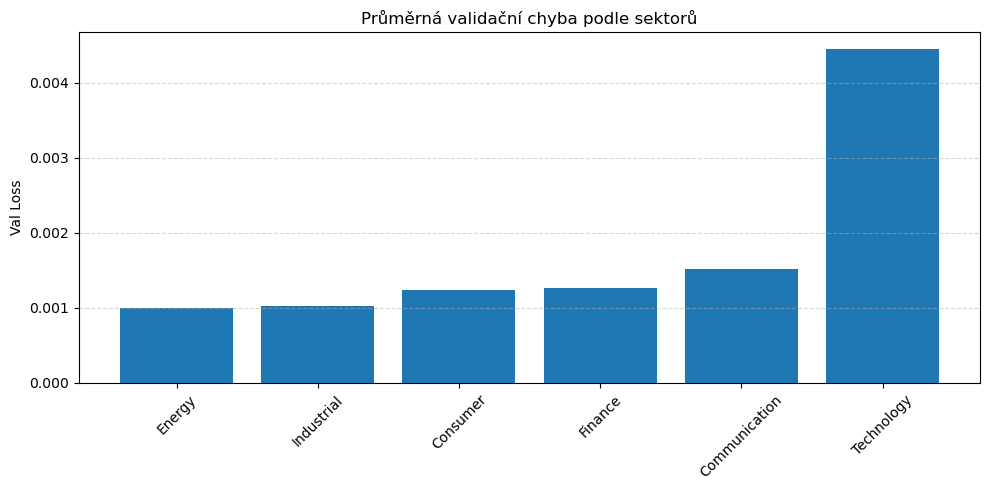

In [20]:
# Průměrná validační chyba podle sektorů
sector_groups = results_df.groupby('sector')['val_loss'].mean().sort_values()

# Sloupcový graf
plt.figure(figsize=(10, 5))
plt.bar(sector_groups.index, sector_groups.values)
plt.title('Průměrná validační chyba podle sektorů')
plt.ylabel('Val Loss')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../results/sector_val_loss_summary.pdf')  # Export do PDF
plt.show()

In [21]:
# Nejnižší validační chyba
top_models = results_df.sort_values('val_loss').head(5)
top_models

,ticker,sector,train_loss,val_loss
16,BA,Industrial,0.00087,0.00027
4,DIS,Communication,0.00089,0.00029
13,CVX,Energy,0.00070,0.00069
9,PG,Consumer,0.00090,0.00071
6,BAC,Finance,0.00098,0.00084


In [22]:
# Export všech výsledků
results_df.to_csv('../results/evaluation_summary.csv', index=False)
print('Výsledky uloženy do evaluation_summary.csv')

Výsledky uloženy do evaluation_summary.csv
